In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.optimize import curve_fit
import math
from tqdm import tqdm

In [10]:
M_list = np.loadtxt('M.txt', dtype = float)
M_list = M_list.tolist()

Chi_list = np.loadtxt('chi.txt',dtype = float)
Chi_list = Chi_list.tolist()

E_list = np.loadtxt('E.txt',dtype = float)
E_list = E_list.tolist()

Cv_list = np.loadtxt('cv.txt', dtype = float)
Cv_list = Cv_list.tolist()

S0SR_list = pd.read_hdf("s0sr_data.h5",key = 'data')

In [11]:
S0SR_list

,0,1,2,3,4,5,6,7,8,9,...,986,987,988,989,990,991,992,993,994,995
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, -1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, -1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
5,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1, 1, 1, 1, 1]","[1, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[1, 1, 1, 1, 1, 1, -1, -1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, -1]","[1, 1, -1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, -1, 1, 1, 1, 1, 1]",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, -1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1

In [12]:
M

NameError: name 'M' is not defined

In [13]:
T= [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 5.5, 6.0, 6.2, 6.3, 6.4, 6.5 ,6.6, 6.7, 6.8, 7.0, 7.2, 7.5, 8.0, 9.0,10.0]

## Fit Magetization Function

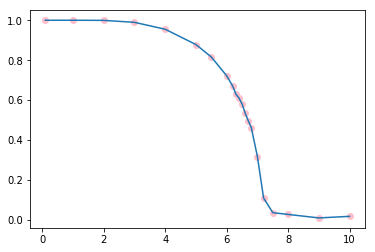

In [14]:
plt.plot(T, M_list,'o',color = 'pink')#color = 'pink'
plt.plot(T, M_list)
plt.show()

In [15]:
def m(T,Tc,A,exponent,b):
    return A*(abs(Tc-T))**(exponent)+b

In [16]:
mag,mag_div = curve_fit(m,T[0:16],M_list[0:16],p0 = np.array([6.5,0.6,5.0,0.001]),
                      bounds = ([0,0,0.46,0],[7.2,np.inf,np.inf,np.inf]),maxfev = 10000)

In [17]:
mag[0],mag[1],mag[-2],mag[-1]

(7.000000031035802, 0.3060248368271717, 0.4616560552431355, 0.3658428671581432)

In [18]:
T[14]

6.8

In [19]:
M_list[14]

0.462956425702811

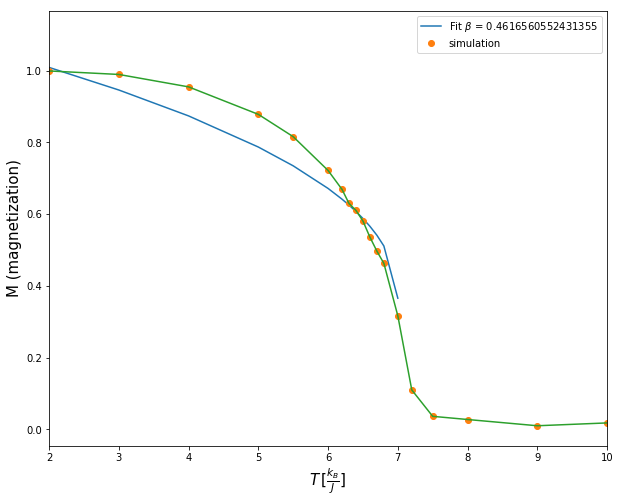

In [173]:
#mag = np.array([7.0, 0.6, 0.5, 0.00001])
plt.figure(figsize=(10,8))
plt.plot(T[0:16], m(np.array(T[0:16]),*mag),label='Fit $\\beta$ = '+str(mag[2]))
plt.plot(T[0:], M_list[0:],'o',label = 'simulation')
plt.plot(T[0:], M_list[0:])
plt.xlim(2,10)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
plt.legend()
plt.show()

In [21]:
_beta = 0.4616560552431355

In [22]:
_Tc1 = 7.000000031035802

# Fit Susceptibility

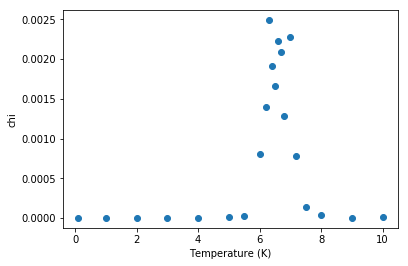

In [23]:
plt.plot(T, Chi_list,'o')#color = 'pink'
#plt.plot(T, Chi_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("chi")
plt.show()

In [24]:
def chi(T,Tc,A,gamma,b):
    return A*(abs(Tc-T))**(-gamma)-b

In [25]:
suscp,suscp_dev = curve_fit(chi,T[0:10],Chi_list[0:10],p0 = np.array([6.65,0.5,0.5,0.00001]),
                      bounds = (0,[7,np.inf,1,np.inf]),maxfev = 100000)

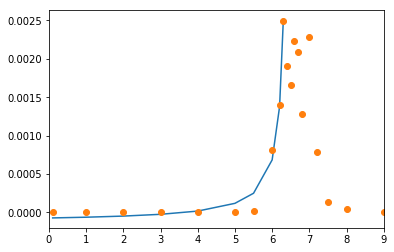

In [26]:
plt.plot(T[0:10], chi(np.array(T[0:10]),*suscp))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,9)
plt.show()

In [27]:
suscp

array([6.43379134e+00, 3.52149131e-04, 9.99999898e-01, 1.29054393e-04])

In [28]:
suscm,suscm_dev = curve_fit(chi,T[15:],Chi_list[15:],p0 = np.array([6.6, 1.95163279e-03, 0.5, 6.93660749e-04]),
                      bounds = (0,[np.inf,np.inf,1,np.inf]),maxfev = 100000)

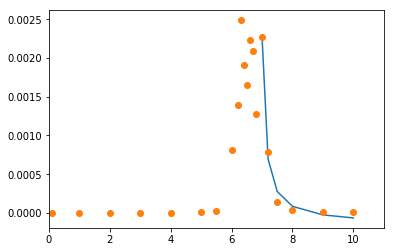

In [29]:
#suscm = np.array([6.2, 1.95163279e-03, 1.00000000e+00, 6.93660749e-04])
plt.plot(T[15:], chi(np.array(T[15:]),*suscm))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,11)
plt.show()

In [30]:
suscm

array([6.89418539e+00, 2.57472691e-04, 9.99999877e-01, 1.48102557e-04])

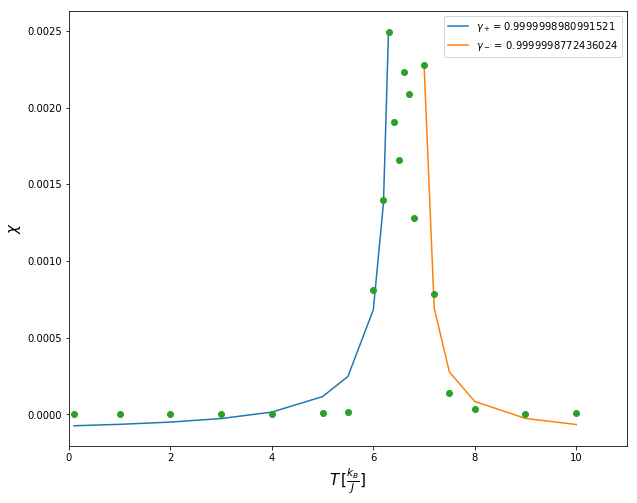

In [60]:
plt.figure(figsize=(10,8))
plt.plot(T[0:10], chi(np.array(T[0:10]),*suscp),label = '$\gamma_+ = $'+str(suscp[-2]))
plt.plot(T[15:], chi(np.array(T[15:]),*suscm),label = '$\gamma_-$ = '+str(suscm[-2]))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,11)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$\chi$",fontsize = 15)
plt.legend()
plt.show()

In [32]:
_gammap = 9.99999898e-01
_gammam = 9.99999877e-01

_gamma = (_gammap+_gammam)/2
_gamma

0.9999998875

In [33]:
_Tc2 = (suscm[0]+suscp[0])/2
_Tc2

6.663988364958619

## Heat Capacity Fit

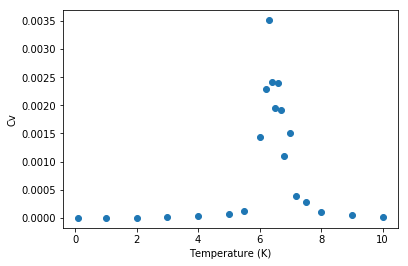

In [34]:
plt.plot(T, Cv_list,'o')#color = 'pink'
#plt.plot(T, Cv_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("Cv")
plt.show()

In [35]:
def cv(T,Tc,A,alpha,b):
    return A*(abs(Tc-T))**(-alpha)-b

In [169]:
heatcap,heatcap_dev = curve_fit(cv,T,Cv_list,p0 = np.array([6.65,5,10,0.000]),maxfev = 100000)

#bounds = ([6.2,0,0,0],[np.inf,np.inf,np.inf,np.inf])

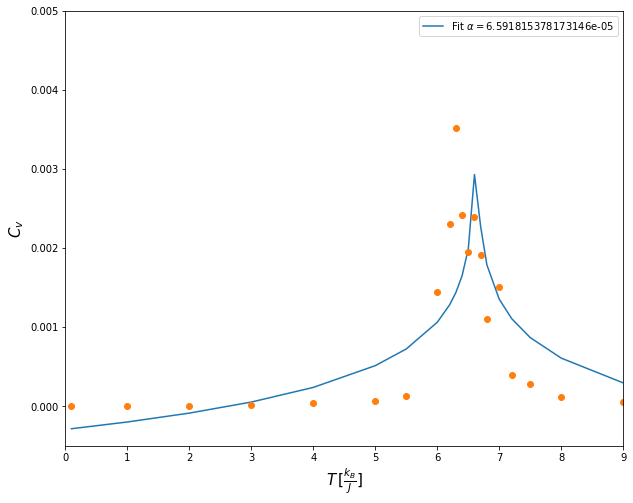

In [172]:
plt.figure(figsize=(10,8))
plt.plot(T, cv(np.array(T),*heatcap),label = 'Fit $\\alpha = $'+str(heatcap[-2]))
plt.plot(T[0:], Cv_list[0:],'o')
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.xlim(0,9)
plt.ylim(-0.0005, 0.005)
plt.legend()
plt.show()

In [166]:
heatcap

array([6.62404151e+00, 5.59640373e+00, 1.02506538e-04, 5.59561544e+00])

In [167]:
_Tc3 = heatcap[0]
_Tc3

6.624041505430623

In [168]:
_alpha = heatcap[-2]
_alpha

0.00010250653840546912

In [158]:
Ave_Tc = (_Tc1+_Tc2+_Tc3)/3
Ave_Tc

6.762676321732037

## Fit Correction Function

In [159]:
G_T = []
for t in range(len(T)):
    G = []
    double=0
    single1=0
    single2=0
    for r in range(1,7):
        double = 0
        single1 =0
        single2 =0
        for nstep in range(0,996):
            double+=S0SR_list[nstep][t][r]
            #single1+=S0[n][i]
            #single2+=S0[n][i]
        #G.append(double/len(S0SR)-(single1/len(S0))*(single2/len(SR)))
        G.append(abs(double/996))
        
    G_T.append(G)

In [160]:
T[14] # The closed value in our simulation

6.8

In [161]:
def Corr(r,eta):
    return r**(-4+2-eta)

eps,eps_div = curve_fit(Corr,np.array(range(1,7)),np.array(G_T[14]), maxfev = 100000)

# Using nv = gamma/(2-eta)
eta = eps[0]
nv = _gamma/(2-eta)
nv

0.3588055535709441

In [174]:
1/0.29976

3.3360021350413662

In [175]:
eta

-0.7870245528467746